In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

##### Imported the training data from my local csv file and updated the index column

In [121]:
df_train = pd.read_csv('../data/training-data-assignment-1.csv')
df_train = df_train.set_index('idx')

##### Splitting up the data points for preparation of 2D-plot

In [122]:
x1_train = df_train.iloc[0].array
x2_train = df_train.iloc[1].array
y = df_train.iloc[2].array

In [123]:
len(y) == len(x1_train) and len(y) == len(x2_train) # just checking that arrays are the same size

True

##### **Q. 6a)** : The plot itself

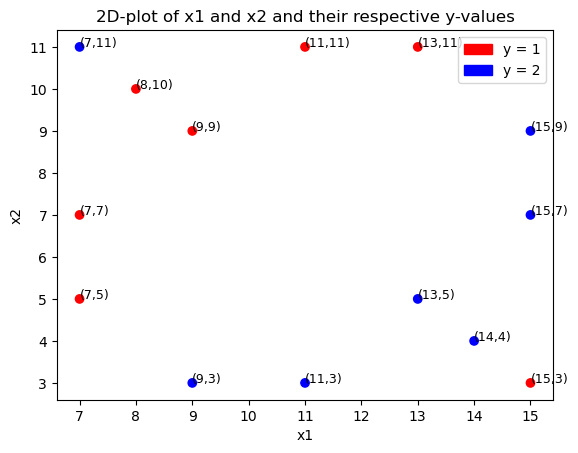

In [124]:
col = ['red' if val == 1 else 'blue' for val in y] #doing a list comprehension, basically setting values of y = 1 to orange else (y = 2) to blue in the array 

plt.scatter(x1_train, x2_train, c = col)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D-plot of x1 and x2 and their respective y-values')

for i, (x1, x2) in enumerate(zip(x1_train, x2_train)):
    plt.text(x1, x2, f'({x1},{x2})', fontsize=9, ha='left')

orange_patch = mpatches.Patch(color='red', label='y = 1')
blue_patch = mpatches.Patch(color='blue', label='y = 2')
plt.legend(handles=[orange_patch, blue_patch])
plt.savefig('observation-plot')

plt.show()

##### Step 4: Preparing the training data for the KNN model

In [125]:
train_x = np.vstack((x1_train, x2_train)).T
train_y = y
len(train_y) # just verifying the length of the array

14

##### Instantiation of the KNN model + fitting + trainig error rate calculation

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(train_x, train_y)

y_predictions = knn.predict(train_x)

training_error_rate = 1 - accuracy_score(train_y, y_predictions)

##### **Q. 6b)** : Training error rate

In [133]:
print(f'The training error rate (measured by the accuracy in classification score) is ' + "{:.2f}%".format(training_error_rate*100))

The training error rate (measured by the accuracy in classification score) is 14.29%


##### Import of the test data (provided in question 6c)) from local csv file + preparation of data

In [15]:
test_df = pd.read_csv('../data/test-data-assignment-1.csv')
test_df = test_df.set_index('idx')

test_x1 = test_df.iloc[0]
test_x2 = test_df.iloc[1]

test_x = np.vstack((test_x1, test_x2)).T #it was neccesary to transpose the matrix after stacking them vertically since the columns were were each single observation rather than x1 and x2


##### **Q. 6c)** : Perfoming the predictions (first row returns probabillites/likelihoods the second one returns the actual classifications)

In [16]:
knn.predict_proba(test_x) #perfoming the predictions, returns the probabillity/likelihood that each input (x1, x2) is eitehr y = 1 or y = 2

array([[0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

In [18]:
preds = knn.predict(test_x) #perfoming the prediction, returning thr actual classifications made by the trained KNN
preds

array([1., 1., 2., 1., 2., 1., 1.])

In [29]:
x1_test = []
x2_test = []

for i in test_x:
    x1_test.append(i[0])
    x2_test.append(i[1])

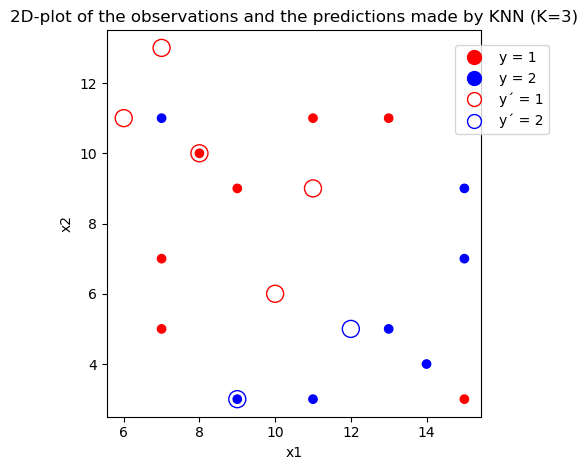

In [119]:
col1 = ['red' if val == 1 else 'blue' for val in y] #doing a list comprehension, basically setting values of y = 1 to orange else (y = 2) to blue in the array 
col2 = ['red' if val == 1 else 'blue' for val in preds] 

plt.scatter(x1_train, x2_train, c = col1)
plt.scatter(x1_test, x2_test, facecolors='None', edgecolors=col2, s=150)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D-plot of the observations and the predictions made by KNN (K=3)')

orange_circle = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=10, label='y = 1')
blue_circle = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=10, label='y = 2')
orange_triangle = mlines.Line2D([], [], markerfacecolor='None', markeredgecolor='red', marker='o', linestyle='None', markersize=10, label='y´ = 1')
blue_triangle = mlines.Line2D([], [], markerfacecolor='None', markeredgecolor='blue', marker='o', linestyle='None', markersize=10, label='y´ = 2')

legend = plt.legend(handles=[orange_circle, blue_circle, orange_triangle, blue_triangle], bbox_to_anchor=(1.2, 0.98))

plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.savefig('prediction-plot', bbox_inches='tight', bbox_extra_artists=[legend])

plt.show()

##### 